In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 


In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

624

In [6]:
# Import our dependencies and initialize counters and an empty list that will hold the weather data.
# Loop through the cities list.
# Group the cities in sets of 50 to log the process as we find the weather data for each city.
# Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
# Build the city_url or endpoint for each city.
# Log the URL and the record and set numbers.
# Make an API request for each city.
# Parse the JSON weather data for the following:
# City, country, and date
# Latitude and longitude
# Maximum temperature
# Humidity
# Cloudiness
# Wind speed
# Add the data to a list in a dictionary format and then convert the list to a DataFrame.

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f6c954fe44c6839fed8d7b04627a9ec


In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [11]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"

In [12]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
 # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")   

Processing Record 1 of Set 13 | busselton
Processing Record 2 of Set 13 | bluff
Processing Record 3 of Set 13 | sola
Processing Record 4 of Set 13 | saldanha
Processing Record 5 of Set 13 | vestmanna
Processing Record 6 of Set 13 | avarua
Processing Record 7 of Set 13 | puerto ayora
Processing Record 8 of Set 13 | pochutla
Processing Record 9 of Set 13 | port alfred
Processing Record 10 of Set 13 | clyde river
Processing Record 11 of Set 13 | tiverton
Processing Record 12 of Set 13 | butaritari
Processing Record 13 of Set 13 | thompson
Processing Record 14 of Set 13 | mys shmidta
City not found. Skipping...
Processing Record 15 of Set 13 | korla
Processing Record 16 of Set 13 | faya
Processing Record 17 of Set 13 | gravdal
Processing Record 18 of Set 13 | skalistyy
City not found. Skipping...
Processing Record 19 of Set 13 | mar del plata
Processing Record 20 of Set 13 | qaanaaq
Processing Record 21 of Set 13 | taolanaro
City not found. Skipping...
Processing Record 22 of Set 13 | kodi

Processing Record 34 of Set 16 | tessalit
Processing Record 35 of Set 16 | severo-kurilsk
Processing Record 36 of Set 16 | lakes entrance
Processing Record 37 of Set 16 | nueve de julio
Processing Record 38 of Set 16 | puerto colombia
Processing Record 39 of Set 16 | ankang
Processing Record 40 of Set 16 | annecy-le-vieux
Processing Record 41 of Set 16 | kaitangata
Processing Record 42 of Set 16 | lichuan
Processing Record 43 of Set 16 | piacabucu
Processing Record 44 of Set 16 | longyearbyen
Processing Record 45 of Set 16 | tarut
Processing Record 46 of Set 16 | ajdabiya
Processing Record 47 of Set 16 | tuatapere
Processing Record 48 of Set 16 | swan hill
Processing Record 49 of Set 16 | surt
Processing Record 50 of Set 16 | nome
Processing Record 1 of Set 17 | utiroa
City not found. Skipping...
Processing Record 2 of Set 17 | haibowan
City not found. Skipping...
Processing Record 3 of Set 17 | gulshat
City not found. Skipping...
Processing Record 4 of Set 17 | capreol
Processing Reco

Processing Record 15 of Set 20 | geraldton
Processing Record 16 of Set 20 | sfantu gheorghe
Processing Record 17 of Set 20 | morden
Processing Record 18 of Set 20 | yuzhnyy
Processing Record 19 of Set 20 | luderitz
Processing Record 20 of Set 20 | uturoa
Processing Record 21 of Set 20 | champerico
Processing Record 22 of Set 20 | visby
Processing Record 23 of Set 20 | uglyanets
Processing Record 24 of Set 20 | walvis bay
Processing Record 25 of Set 20 | guajara-mirim
City not found. Skipping...
Processing Record 26 of Set 20 | igarka
Processing Record 27 of Set 20 | kamaishi
Processing Record 28 of Set 20 | anaconda
Processing Record 29 of Set 20 | cayenne
Processing Record 30 of Set 20 | sarab
Processing Record 31 of Set 20 | sakete
Processing Record 32 of Set 20 | alice springs
Processing Record 33 of Set 20 | coihaique
Processing Record 34 of Set 20 | nanchang
Processing Record 35 of Set 20 | novoagansk
Processing Record 36 of Set 20 | port hardy
Processing Record 37 of Set 20 | nyu

Processing Record 7 of Set 24 | byron bay
Processing Record 8 of Set 24 | kahului
Processing Record 9 of Set 24 | abha
Processing Record 10 of Set 24 | nagaur
Processing Record 11 of Set 24 | saint-pierre
Processing Record 12 of Set 24 | bambanglipuro
Processing Record 13 of Set 24 | lev tolstoy
Processing Record 14 of Set 24 | sorong
Processing Record 15 of Set 24 | marsh harbour
Processing Record 16 of Set 24 | zhigansk
Processing Record 17 of Set 24 | maragogi
Processing Record 18 of Set 24 | novopokrovka
Processing Record 19 of Set 24 | san patricio
Processing Record 20 of Set 24 | ixtapa
Processing Record 21 of Set 24 | san rafael
Processing Record 22 of Set 24 | severodvinsk
Processing Record 23 of Set 24 | petropavl
Processing Record 24 of Set 24 | beyneu
Processing Record 25 of Set 24 | poronaysk
Processing Record 26 of Set 24 | topolobampo
Processing Record 27 of Set 24 | nurota
Processing Record 28 of Set 24 | peterhead
Processing Record 29 of Set 24 | billings
Processing Rec

In [13]:
len(city_data)

574

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.65,115.33,51.01,75,62,12.15,AU,2020-06-25 21:54:07
1,Bluff,-46.60,168.33,39.00,83,1,3.00,NZ,2020-06-25 21:54:07
2,Sola,-13.88,167.55,80.60,94,75,5.82,VU,2020-06-25 21:54:08
3,Saldanha,-33.01,17.94,57.20,93,93,6.93,ZA,2020-06-25 21:54:08
4,Vestmanna,62.16,-7.17,51.80,87,100,6.93,FO,2020-06-25 21:54:08
5,Avarua,-21.21,-159.78,75.20,60,30,5.82,CK,2020-06-25 21:54:08
6,Puerto Ayora,-0.74,-90.35,78.80,61,74,13.87,EC,2020-06-25 21:54:08
7,Pochutla,15.74,-96.47,89.60,55,90,11.41,MX,2020-06-25 21:54:08
8,Port Alfred,-33.59,26.89,70.00,31,0,7.00,ZA,2020-06-25 21:54:08
9,Clyde River,70.47,-68.59,48.20,81,20,10.29,CA,2020-06-25 21:54:08


In [19]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Busselton,AU,2020-06-25 21:54:07,-33.65,115.33,51.01,75,62,12.15
1,Bluff,NZ,2020-06-25 21:54:07,-46.60,168.33,39.00,83,1,3.00
2,Sola,VU,2020-06-25 21:54:08,-13.88,167.55,80.60,94,75,5.82
3,Saldanha,ZA,2020-06-25 21:54:08,-33.01,17.94,57.20,93,93,6.93
4,Vestmanna,FO,2020-06-25 21:54:08,62.16,-7.17,51.80,87,100,6.93
...,...,...,...,...,...,...,...,...,...
569,Henties Bay,NA,2020-06-25 21:55:14,-22.12,14.28,55.99,92,0,1.01
570,Pasighat,IN,2020-06-25 21:55:15,28.07,95.33,75.18,88,100,2.84
571,Wanaka,NZ,2020-06-25 21:55:15,-44.70,169.15,38.95,80,90,0.78
572,Obigarm,TJ,2020-06-25 21:55:15,38.72,69.71,66.94,43,98,4.52


In [20]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [21]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [22]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1593124243.388597

In [23]:
today = time.strftime("%x")
today

'06/25/20'

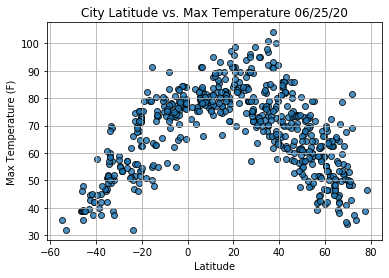

In [24]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

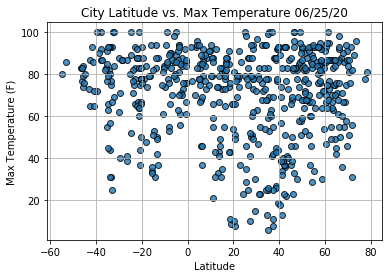

In [25]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

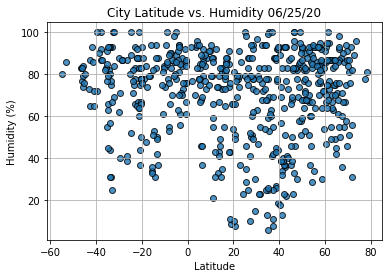

In [26]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

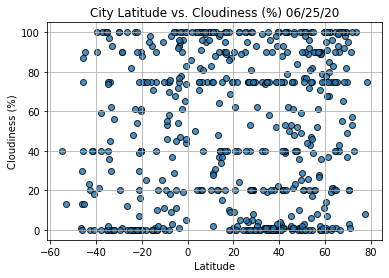

In [27]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

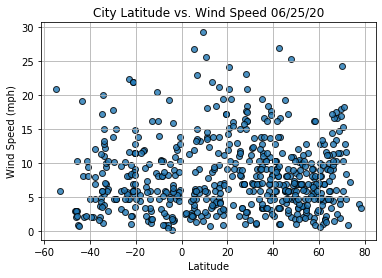

In [28]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()